## Let's start with a analysis of the dataset.
We split the information in different files and the data size was considerable, that's why we want to take a look more deep into the information

We DROP the next columns, with the following reasons:
*   Fwd PSH Flags = Just 1 or 0, but the most values are 0's
*   Bwd PSH Flags = All 0's
*   Fwd URG Flags = All 0's
*   Bwd URG Flags = All 0's

*   URG Flag Count = All 0's
*   CWR Flag Count = All 0's	
*   ECE Flag Count = All 0's

*   Fwd Bytes/Bulk Avg = All 0's
*   Fwd Packet/Bulk Avg	= All 0's
*   Fwd Bulk Rate Avg = All 0's

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, RepeatedKFold, cross_validate
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

import warnings
import time

import keras

TARGET_VARIABLE = 'Traffic Subtype'
DROP_COLUMNS = ['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Timestamp',
                'Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags',
                'URG Flag Count', 'CWR Flag Count', 'ECE Flag Count',
                'Fwd Bytes/Bulk Avg', 'Fwd Packet/Bulk Avg', 'Fwd Bulk Rate Avg']

#TARGET_TO_DROP = {'Label': ['Traffic Type', 'Traffic Subtype'],
#                  'Traffic Type': ['Label', 'Traffic Subtype'],
#                  'Traffic Subtype': ['Label', 'Traffic Type']}

#Load extracted data
df = pd.read_csv("data.csv")

# Initial data overview
counts = df.groupby(['Label', 'Traffic Type', 'Traffic Subtype']).size().reset_index(name='Counts')
print(counts)


        Label           Traffic Type        Traffic Subtype   Counts
0      Benign                  Audio                  Audio      190
1      Benign             Background             Background       32
2      Benign                   Text                   Text      209
3      Benign                  Video             Video HTTP      376
4      Benign                  Video              Video RTP      349
5      Benign                  Video              Video UDP      145
6   Malicious             Bruteforce         Bruteforce DNS    22179
7   Malicious             Bruteforce         Bruteforce FTP     3485
8   Malicious             Bruteforce        Bruteforce HTTP      628
9   Malicious             Bruteforce         Bruteforce SSH     3967
10  Malicious             Bruteforce      Bruteforce Telnet     4913
11  Malicious                    DoS                DoS ACK   936307
12  Malicious                    DoS                DoS CWR   872523
13  Malicious                    D

In [2]:
# Drop collumns and timestamp
df = df.drop(columns=DROP_COLUMNS)

# Filter out duplicates within the same target
df = df.round(3)
df = df.drop_duplicates()
#df = df.drop(columns=TARGET_TO_DROP[TARGET_VARIABLE])

# Separate features and target
X = df.drop(TARGET_VARIABLE, axis=1)
y = df[TARGET_VARIABLE]




Split dataset in types


In [3]:
df_audio = df[df['Traffic Type'] == 'Audio']
df_video = df[df['Traffic Type'] == 'Video']
df_text = df[df['Traffic Type'] == 'Text']
df_Background = df[df['Traffic Type'] == 'Background']
df_Dos = df[df['Traffic Type'] == 'DoS']
df_Info_G = df[df['Traffic Type'] == 'Information Gathering']
df_Mirai = df[df['Traffic Type'] == 'Mirai']
df_Bruteforce = df[df['Traffic Type'] == 'Bruteforce']


Text(0.5, 1.0, 'Flow Duration Bruteforce')

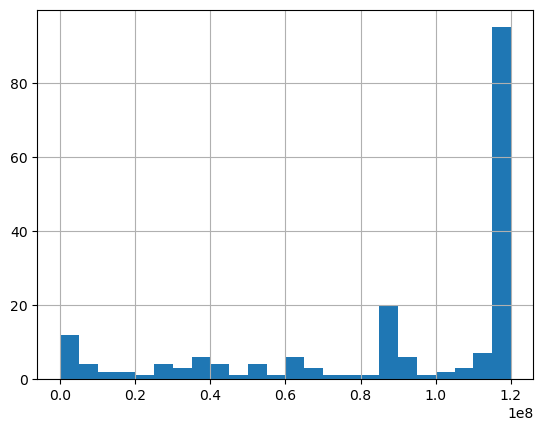

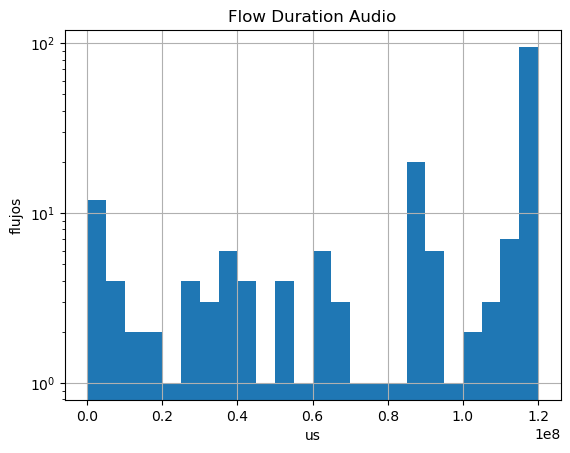

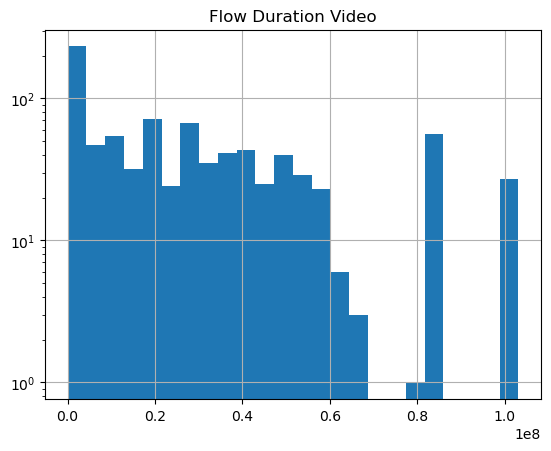

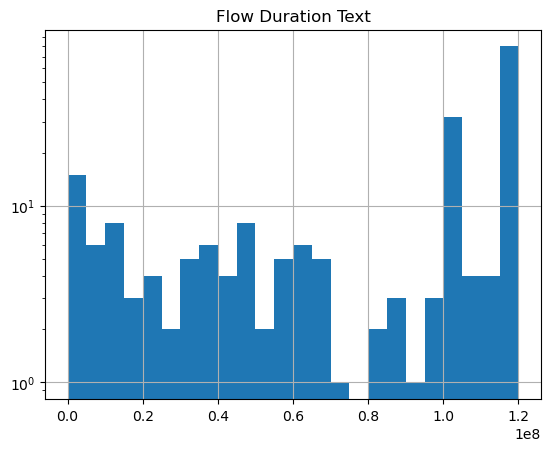

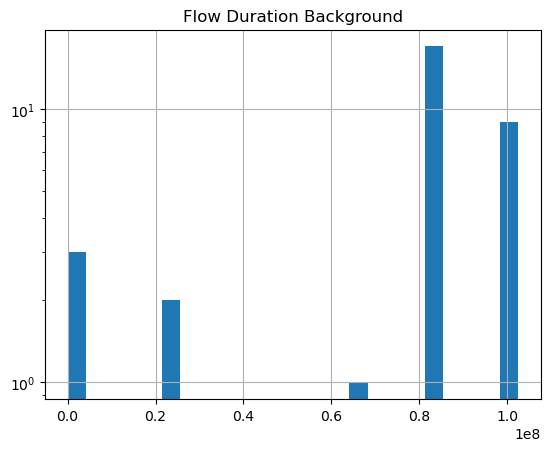

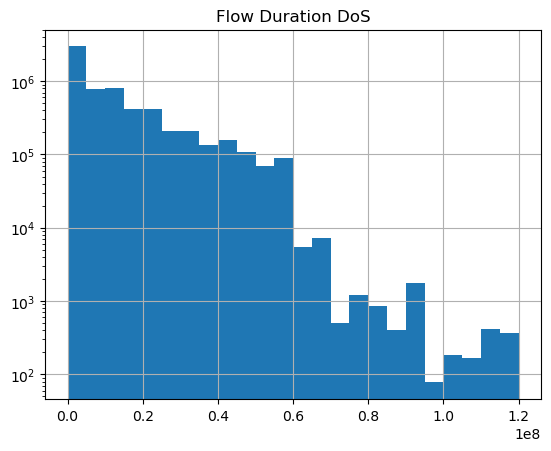

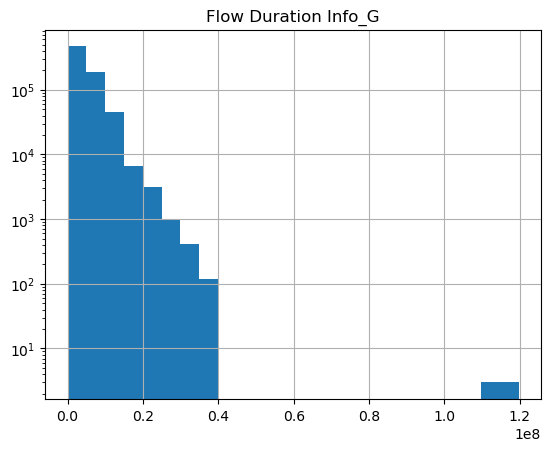

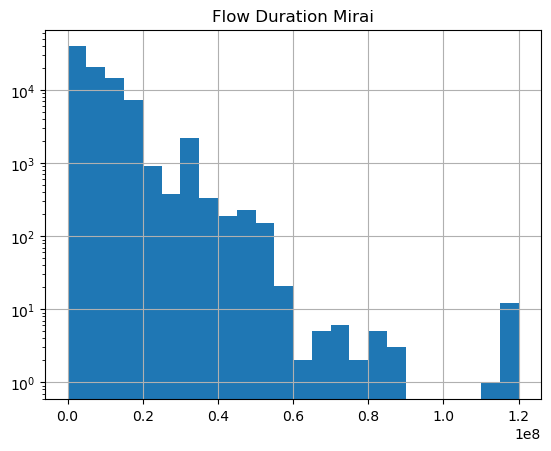

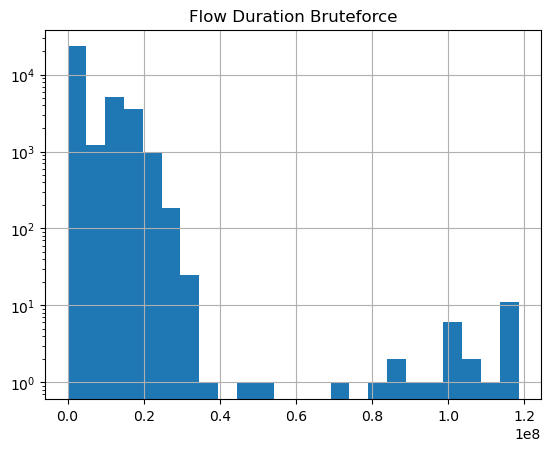

In [17]:
plt.grid()
plt.hist(df_audio["Flow Duration"],bins=24);


plt.figure()
plt.hist(df_audio["Flow Duration"],bins=24);
plt.yscale("log")
plt.grid()
plt.title("Flow Duration Audio") 
plt.xlabel("us")
plt.ylabel("flujos")

plt.figure()
plt.hist(df_video["Flow Duration"],bins=24);
plt.yscale("log")
plt.grid()
plt.title("Flow Duration Video") 

####

plt.figure()
plt.hist(df_text["Flow Duration"],bins=24);
plt.yscale("log")
plt.grid()
plt.title("Flow Duration Text")

plt.figure()
plt.hist(df_Background["Flow Duration"],bins=24);
plt.yscale("log")
plt.grid()
plt.title("Flow Duration Background")

plt.figure()
plt.hist(df_Dos["Flow Duration"],bins=24);
plt.yscale("log")
plt.grid()
plt.title("Flow Duration DoS")

plt.figure()
plt.hist(df_Info_G["Flow Duration"],bins=24);
plt.yscale("log")
plt.grid()
plt.title("Flow Duration Info_G")

plt.figure()
plt.hist(df_Mirai["Flow Duration"],bins=24);
plt.yscale("log")
plt.grid()
plt.title("Flow Duration Mirai")

plt.figure()
plt.hist(df_Bruteforce["Flow Duration"],bins=24);
plt.yscale("log")
plt.grid()
plt.title("Flow Duration Bruteforce")